# Project: Wrangling and Analyze Data

**Project Overview**

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


## Table of Contents
* [Section#1: Data Gathering](#DG)
* [Section#2: Assessing Data](#AD)
* [Section#3: Cleaning Data](#CD)
* [Section#4: Storing Data](#SD)
* [Section#5: Analyzing and visualizing](#AV)

## Data Gathering <a class="anchor" id="DG"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import packges
import numpy as np
import pandas as pd

In [2]:
#read csv file to dataframe
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
#content of image_prediction.tsv
images_df = pd.read_csv('image_predictions.tsv', sep = '\t')
images_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
       # print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
         #   print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
         #   print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#query data from tweet_json.txt file
contents = []
with open("tweet-json.txt") as file:
    for line in file:
        line_value = json.loads(line)
        contents.append(line_value)
    
df_tweet_temp = pd.DataFrame(contents)
df_tweet_extra = df_tweet_temp[['id', 'retweet_count','favorite_count']].copy()


In [7]:
df_tweet_extra

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data <a class="anchor" id="AD"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

In [8]:
#sample of df 
##Return a random sample of items from an axis of object.
archive_df.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
936,753375668877008896,NaN,NaN,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
463,817423860136083457,NaN,NaN,2017-01-06 17:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
1142,727524757080539137,NaN,NaN,2016-05-03 15:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727524757...,10,10,None,None,None,pupper,None
374,828372645993398273,NaN,NaN,2017-02-05 22:40:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexander Hamilpup. He was one of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,None,None
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None
1660,683078886620553216,NaN,NaN,2016-01-02 00:14:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a nifty leaping pupper. Feet look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683078886...,9,10,None,None,None,pupper,None


In [9]:
#Print a concise summary of a DataFrame.
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#Return a Series containing counts of unique values of rating numerator
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
#Return a Series containing counts of unique values of rating_denominator
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#all rows of rating_denominator larger than 10
archive_df[archive_df.rating_denominator >10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [13]:
#Compute the length of each element in the Series of rating denominator that larger than 10.
len(archive_df[archive_df.rating_denominator >10])

20

In [14]:
#Compute the length of each element in the Series of rating_numerator that larger than 20.
len(archive_df[archive_df.rating_numerator >20])

24

In [15]:
#check duplicated tweet id
sum(archive_df.tweet_id.duplicated())

0

In [16]:
archive_df.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
the              8
Daisy            7
Bailey           7
an               7
Toby             7
Buddy            7
Oscar            6
Milo             6
Bella            6
Leo              6
Dave             6
Stanley          6
Jack             6
Jax              6
Scout            6
Koda             6
Rusty            6
Bentley          5
              ... 
Christoper       1
Jaycob           1
all              1
Patch            1
Lambeau          1
Jimbo            1
Vinnie           1
Mark             1
Evy              1
Chuq             1
Jazz             1
Luther           1
Lugan            1
Dallas           1
infuriating      1
Zeek             1
Butters          1
Billy            1
Teddy            1
Brooks           1
Donny            1
Carll       

In [17]:
#show only 20 top names and their corresponding counts
archive_df.name.value_counts()[:20]

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Bailey       7
an           7
Toby         7
Buddy        7
Oscar        6
Milo         6
Name: name, dtype: int64

In [18]:
#plot of names and their corresponding value counts 
archive_df.name.value_counts()[:20].plot(kind='barh')

In [19]:
#dictionary of dog stages and corresponding value counts of each stage
dog_stages = {
  "doggo": archive_df.doggo.value_counts()[1],
  "floofer": archive_df.floofer.value_counts()[1],
  "pupper": archive_df.pupper.value_counts()[1],
  "puppo": archive_df.puppo.value_counts()[1]
}
dog_stages

{'doggo': 97, 'floofer': 10, 'pupper': 257, 'puppo': 30}

In [20]:
#descriptive statistics.
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
images_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [22]:
# general information of images dataframe
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#Return the last n rows.
images_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
#check duplicates in tweet id of images_df
sum(images_df.tweet_id.duplicated())

0

In [25]:
#check duplicates in jpg url of images_df
sum(images_df.jpg_url.duplicated())

66

In [26]:
# p1 predictions and their value counts
images_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [27]:
# p2 predictions and their value counts
images_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
chow                               20
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [28]:
# p3 predictions and their value counts
images_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [29]:
#Return the first n rows.
df_tweet_extra.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [30]:
#Return the last n rows.
df_tweet_extra.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [31]:
# general information od df_tweet_extra dataframe
df_tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [32]:
#check if there is any duplication of ids (tweet ids)
sum(df_tweet_extra.id.duplicated())

0

### Quality issues
#### <font color='DarkSalmon'>Regarding archive_df</font> <font color='IndianRed'>, image_df</font> <font color='DarkRed'>and df_tweet_extra dataframes</font>

1. missing data in columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, and in_reply_to_user_id.
2. tweet_id is an int instead of a string.
3. timestamp, and retweeted_status_timestamp are object instead of datetime.
4. retweeted_status_id and retweeted_status_user_id are floats instead of strings.

5. abnormal values in rating_numerator and rating_denominator, as the rating_denominator should be bound to 10, while there are extreme large values in rating_numerator as well as rating_denominator. Also, rating_numerator and rating_denominator should be float.

6. name column has values that are incorrect, including None, a, the, an.

7. nondescriptive column headers: {text:tweet_content, name:dog_name}

8. tweet_id is an int instead of a string in images_df.

9. duplicated jpg_url in images_df.

10. p1, p2, p3 in images_df contain underscore symbol in some of the predictions' names, for example: Labrador_retriever, Boston_bull, etc.

11. Predictions names' first letter in p1, p2, and p3 sometimes appears to be lowercase letters, while in some cases, predictions names start with uppercase letters, which forms an inconsistency issue.

12. Remove retweets (text column starts with RT @)

### Tidiness issues
#### <font color='DarkSalmon'>Regarding archive_df</font> <font color='IndianRed'>, image_df</font> <font color='DarkRed'>and df_tweet_extra dataframes</font>
1. doge stages take four columns instead of one.

2. unrequired colunms should be deleted.

3. images_df columns should be part of archive_df dataframe.

4. add column for rating.

5. df_tweet_extra columns should be part of archive_df dataframe.

## Cleaning Data <a class="anchor" id="CD"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [232]:
# Make copies of original pieces of data
images_df_copy= images_df.copy()
df_tweet_extra_copy= df_tweet_extra.copy()
archive_df_copy= archive_df.copy()

In [233]:
df_tweet_extra_copy.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [234]:
archive_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [235]:
images_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #1: <font color='Yellow'>Fix deplicated jpg_url in images_df </font> 

#### Define

Remove duplication in jpg_url column using `drop_duplicates` method.

#### Code

In [236]:
#jpgs = images_df_copy["jpg_url"]
#images_df_copy[jpgs.isin(jpgs[jpgs.duplicated()])]
#duplicated images
images_df_copy[images_df_copy.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [237]:
print(images_df_copy.jpg_url[images_df_copy.jpg_url.duplicated()])

1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
1364    https://pbs.twimg.com/tweet_video_thumb/CeBym7...
1368      https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg
1387      https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg
1407      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1417      https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
1427      https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg
1446      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1453      https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg
1456      https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg
1463      https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg
1476      https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg
1487      https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg
1495      http

In [238]:
#number of duplicated jpg url
sum(images_df_copy.jpg_url.duplicated())

66

In [239]:
#delete duplicated jpg url
images_df_copy.drop_duplicates(subset=['jpg_url'],  keep=False, inplace=True)

#### Test

In [240]:
sum(images_df_copy.jpg_url.duplicated())

0

### Issue #2: <font color='red'>Merge all the dataframes (archive_df_copy, images_df_copy and df_tweet_extra_copy) into one dataframe named main_archive_df</font> 

#### Define:  
Join the two tables into the archive_df table using the merge function, and then copy it to the new dataframe main_archive_df using the copy function.

#### Code

In [241]:
#join or merge two df to make one df containing all details of original dfs
archive_df_copy = pd.merge(archive_df_copy, images_df_copy,
                            on=['tweet_id','tweet_id'], how='left')
archive_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [242]:
#need rename column id to tweet_id for joining two tables based on tweet_id column
df_tweet_extra_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

In [243]:
archive_df_copy = pd.merge(archive_df_copy, df_tweet_extra_copy,
                            on=['tweet_id','tweet_id'], how='left')

In [244]:
main_archive_df=archive_df_copy.copy()

#### Test

In [245]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       19

### Issue #3: <font color='LightSalmon'>Change the datatype of tweet_id from integer to string </font> 

#### Define

Convert the tweet_id column's data type from an integer to a string using `astype`

#### Code

In [246]:
#Convert the tweet_id column's data type from a integer to a string using `astype`
main_archive_df.tweet_id = main_archive_df.tweet_id.astype(str)

#### Test

In [247]:
main_archive_df.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

### Issue #4:  <font color='HotPink'>Change the datatype of timestamp and retweeted_status_timestamp from object to datetime</font> 

#### Define

Convert the  timestamp and retweeted_status_timestamp data type from object to a datetime using `pd. to_datetime() function`

#### Code

In [248]:
#Convert the  timestamp and retweeted_status_timestamp data type from object to a datetime using `pd. to_datetime() function`
main_archive_df['timestamp'] = pd.to_datetime(main_archive_df['timestamp'])
main_archive_df['retweeted_status_timestamp'] = pd.to_datetime(main_archive_df['retweeted_status_timestamp'])

#### Test

In [249]:
main_archive_df['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

In [250]:
main_archive_df['retweeted_status_timestamp'][19:20]

19   2017-07-19 00:47:34
Name: retweeted_status_timestamp, dtype: datetime64[ns]

In [251]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url        

### Issue #5: <font color='MediumVioletRed'>Change the datatype of retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id and in_reply_to_user_id from float to string </font> 

#### Define

Convert the retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id and in_reply_to_user_id columns data type from a float to a string using `astype`

#### Code

In [252]:
#changing datatype of multiple columns to string using str
main_archive_df.retweeted_status_id = main_archive_df.tweet_id.astype(str)
main_archive_df.retweeted_status_user_id = main_archive_df.tweet_id.astype(str)
main_archive_df.in_reply_to_status_id = main_archive_df.tweet_id.astype(str)
main_archive_df.in_reply_to_user_id = main_archive_df.tweet_id.astype(str)


#### Test

In [253]:
print(main_archive_df.dtypes[:10])

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
dtype: object


### Issue #6: <font color='Lime'>Change datatype of rating_numerator and rating_denominator from int to float and Fix abnormal values in rating_numerator and rating_denominator </font> 

#### Define

* Change the data type of rating_numerator and rating_denominator from int to float using `astype`. 

* Fix unrealistic values in rating_numerator and rating_denominator by setting abnormalities of rating_numerator to the mean and keeping the rating_denominator at standardized value of 10. here `where` method is used.

#### Code

In [254]:
#change datatype to float using astype function
main_archive_df.rating_numerator = main_archive_df.rating_numerator.astype(float)
main_archive_df.rating_denominator = main_archive_df.rating_denominator.astype(float)


In [255]:
#stats info regarding rating numerator
main_archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [256]:
main_archive_df.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

In [257]:
main_archive_df.rating_denominator.value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [258]:
#where is used here to set all the value of rating numberator that above 20 to the mean value of this column
main_archive_df.rating_numerator.where(main_archive_df.rating_numerator < 20, 13.126486, inplace=True)


In [259]:
#using where to make all rating denominator value equal to standardized value which is 10
main_archive_df.rating_denominator.where(main_archive_df.rating_denominator < 10, 10, inplace=True)
main_archive_df.rating_denominator.where(main_archive_df.rating_denominator > 10, 10, inplace=True)

#### Test

In [260]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url  

In [261]:
main_archive_df.rating_numerator.value_counts()

12.000000    558
11.000000    464
10.000000    461
13.000000    351
9.000000     158
8.000000     102
7.000000      55
14.000000     54
5.000000      37
6.000000      32
13.126486     25
3.000000      19
4.000000      17
2.000000       9
1.000000       9
0.000000       2
15.000000      2
17.000000      1
Name: rating_numerator, dtype: int64

In [262]:
main_archive_df.rating_denominator.value_counts()

10.0    2356
Name: rating_denominator, dtype: int64

### Issue #7: <font color='MediumSeaGreen'>Create column for final rating score based on rating_numerator and rating_denominator values of dogs </font> 

#### Define

Calculate the rating score for each dog in dataframe and store it in new column named rating_score.

#### Code

In [263]:
main_archive_df['rating_score']= main_archive_df.rating_numerator / main_archive_df.rating_denominator


#### Test

In [264]:
main_archive_df.rating_score.sample(10)

624     1.3
1046    1.1
250     1.2
1582    1.1
561     1.2
1065    0.9
144     1.3
1526    1.1
2038    0.1
715     1.3
Name: rating_score, dtype: float64

In [265]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url  

### Issue #8: <font color='OliveDrab'>Fix naming in name column that have incorrect values including None, a, the, an </font> 

#### Define

Fix incorrect names in name column using`np.where,len() and isalpha methods `

#### Code

In [266]:
main_archive_df.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
the              8
Daisy            7
Bailey           7
an               7
Toby             7
Buddy            7
Oscar            6
Milo             6
Bella            6
Leo              6
Dave             6
Stanley          6
Jack             6
Jax              6
Scout            6
Koda             6
Rusty            6
Bentley          5
              ... 
Christoper       1
Jaycob           1
all              1
Patch            1
Lambeau          1
Jimbo            1
Vinnie           1
Mark             1
Evy              1
Chuq             1
Jazz             1
Luther           1
Lugan            1
Dallas           1
infuriating      1
Zeek             1
Butters          1
Billy            1
Teddy            1
Brooks           1
Donny            1
Carll       

In [267]:
#function search for names of dog based on specified length
def wordlist(a):
    for word in main_archive_df.name:
        if len(word) == a and word.isalpha():
            print(word )  

In [268]:
wordlist(1) 

a
a
O
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [269]:
wordlist(2)  

Mo
Bo
Bo
Bo
Bo
Bo
Bo
an
Al
my
Bo
Bo
an
an
Bo
by
Ed
JD
an
Jo
an
an
an


In [270]:
wordlist(3) 

Jax
Ted
Jim
Gus
Rey
Aja
Jed
Leo
Ken
Max
Ava
Eli
Ash
Leo
not
Mia
Leo
Gus
one
Ike
Tom
Ken
Alf
Sky
Tyr
Moe
Ted
Sam
Gus
Ito
Doc
Tyr
Eli
mad
Leo
Doc
Jay
Mya
Lou
Eve
Jax
one
Dex
Ace
Max
Zoe
Jax
Blu
not
his
one
Gus
Ted
Leo
mad
Jax
all
Sid
old
Max
Ole
Bob
Leo
the
the
Obi
Jax
Evy
Tug
Mia
the
Ash
the
Moe
Jeb
Ava
Bob
Gus
one
Dot
Eve
Mac
Taz
Cal
Mia
the
Jax
Pip
Lou
Amy
Gin
Edd
Sam
Ben
Dug
the
Ron
Stu
the
the


In [271]:
wordlist(4)  

None
None
Zoey
Koda
None
Zeke
such
None
None
Maya
None
None
None
None
Earl
Lola
None
None
Yogi
Noah
None
Alfy
Koko
Gary
None
None
None
None
Jack
Emmy
Beau
None
Emmy
None
None
None
None
Cash
Coco
None
None
None
None
None
None
Kody
Dawn
None
None
None
Cody
Zoey
None
None
None
None
None
Lili
Coco
None
None
None
None
Dave
None
None
None
Burt
None
Carl
None
None
None
None
None
Thor
None
None
None
Zeke
Luna
None
None
None
None
None
None
None
None
None
Arya
None
None
None
None
None
None
Iggy
Kyle
None
None
None
None
Odin
None
None
None
None
Tuck
None
None
None
None
None
None
Luna
None
Hank
None
None
Dawn
None
None
None
None
Odie
None
Arlo
None
None
None
None
Lucy
None
None
Lucy
None
Rory
Lola
None
Lola
None
None
None
Tobi
None
None
None
None
None
None
Kuyu
None
Pete
None
Kyro
Loki
None
Mutt
Bear
None
Kona
Phil
Loki
None
None
None
None
Toby
None
None
Nala
None
Cash
None
None
None
None
Gabe
None
None
Luca
None
Finn
None
None
None
None
None
Anna
None
Finn
Bear
None
Dido
None
None
Jack
Jack
None


In [272]:
#relplace all names in the list from name column with no name as referring there is no registered name for this dog
list_a=['a','O','and','an','my','by','the','not','all','one','None', 'very', 'just']
for x in list_a:
    main_archive_df["name"] = np.where(main_archive_df["name"] == x, 'no name',main_archive_df["name"])


#### Test

In [273]:
main_archive_df.name.value_counts()

no name        834
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
Bailey           7
Toby             7
Daisy            7
Buddy            7
Bella            6
Jax              6
Koda             6
Rusty            6
Leo              6
Oscar            6
Stanley          6
Milo             6
Scout            6
Dave             6
Jack             6
Sunny            5
Finn             5
George           5
Alfie            5
              ... 
Christoper       1
Jaycob           1
Erik             1
Dallas           1
Patch            1
Maya             1
Vinnie           1
Chuq             1
Teddy            1
Jazz             1
Luther           1
Lugan            1
Carbon           1
infuriating      1
Zeek             1
Butters          1
Billy            1
Evy              1
Donny            1
Mark             1
Carll            1
Lucia       

### Issue #9: <font color='DeepSkyBlue'> Create column for dog stages (doggo, floofer, pupper and puppo) </font> 

#### Define

create dog stages column using `melt` function, delete four columns (doggo, floofer, pupper and puppo) from main_archive_df using `drop` function and merge the new column dog_stages into the main dataframe.

#### Code

In [274]:
main_archive_df.head() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating_score
0,892420643555336193,892420643555336193,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,1.3
1,892177421306343426,892177421306343426,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,1.3
2,891815181378084864,891815181378084864,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,1.2
3,891689557279858688,891689557279858688,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,1.3
4,891327558926688256,891327558926688256,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,1.2


In [275]:
#create dog stages column using melt function while keeping only no none values
result = main_archive_df.melt(id_vars=['tweet_id'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
    var_name='Dog_stages', value_name='Value')
result = result[result["Value"] != "None"]
result


,tweet_id,Dog_stages,Value
9,890240255349198849,doggo,doggo
43,884162670584377345,doggo,doggo
99,872967104147763200,doggo,doggo
108,871515927908634625,doggo,doggo
110,871102520638267392,doggo,doggo
121,869596645499047938,doggo,doggo
172,858843525470990336,doggo,doggo
191,855851453814013952,doggo,doggo
200,854010172552949760,doggo,doggo
211,851953902622658560,doggo,doggo


In [276]:
#only one column is need therefore delete value column
result.drop(columns=["Value"], inplace=True)
#drop all four columns of dog stages
main_archive_df.drop(columns=["doggo", "floofer", "pupper", "puppo"], inplace=True)
#add the new column of doge stages
main_archive_df = pd.merge(main_archive_df, result,
                            on=['tweet_id','tweet_id'], how='left')

#### Test

In [277]:
main_archive_df.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating_score,Dog_stages
1021,747512671126323200,747512671126323200,747512671126323200,2016-06-27 19:31:23,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,747512671126323200,747512671126323200,NaT,https://twitter.com/dog_rates/status/747512671...,...,malinois,0.095089,True,German_shepherd,0.080146,True,1803.0,6110.0,1.0,NaN
283,839290600511926273,839290600511926273,839290600511926273,2017-03-08 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,839290600511926273,839290600511926273,2017-03-08 01:41:24,https://twitter.com/alexmartindawg/status/8392...,...,monitor,0.101565,False,screen,0.075306,False,158.0,0.0,1.0,pupper
2251,668142349051129856,668142349051129856,668142349051129856,2015-11-21 19:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,668142349051129856,668142349051129856,NaT,https://twitter.com/dog_rates/status/668142349...,...,hen,0.037793,False,wood_rabbit,0.011015,False,306.0,592.0,0.2,NaN
1007,748346686624440324,748346686624440324,748346686624440324,2016-06-30 02:45:28,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",748346686624440324,748346686624440324,NaT,https://twitter.com/dog_rates/status/748346686...,...,whippet,0.231428,True,Saluki,0.058261,True,1413.0,5735.0,1.0,NaN


In [278]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 28 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         2370 non-null object
in_reply_to_user_id           2370 non-null object
timestamp                     2370 non-null datetime64[ns]
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           2370 non-null object
retweeted_status_user_id      2370 non-null object
retweeted_status_timestamp    183 non-null datetime64[ns]
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null float64
rating_denominator            2370 non-null float64
name                          2370 non-null object
jpg_url                       1952 non-null object
img_num                       1952 non-null float64
p1                            1952 non-null object
p1_conf                       1952 non-null float64
p1_dog 

### Issue #10: <font color='MediumBlue'>Remove underscore symbol in  p1, p2, p3 columns that contains predictions names including Labrador_retriever, Boston_bull etc. </font> 

#### Define

Remove underscore symbol from predctions values in p1, p2, p3 using `replace function`

#### Code

In [279]:
#replacing underscore from all 3 columns of prediction (p1,p2 and p3)
main_archive_df.p1 = main_archive_df.p1.replace(r"_", " ", regex=True)
main_archive_df.p2 = main_archive_df.p2.replace(r"_", " ", regex=True)
main_archive_df.p3 = main_archive_df.p3.replace(r"_", " ", regex=True)

#### Test

In [280]:
main_archive_df.p1.value_counts()

golden retriever             130
Labrador retriever            91
Pembroke                      87
Chihuahua                     75
pug                           53
chow                          38
Pomeranian                    38
Samoyed                       37
toy poodle                    37
malamute                      28
French bulldog                26
cocker spaniel                24
Chesapeake Bay retriever      23
miniature pinscher            21
Siberian husky                20
seat belt                     20
German shepherd               20
web site                      19
Maltese dog                   18
Staffordshire bullterrier     18
teddy                         18
Shetland sheepdog             18
Eskimo dog                    18
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian greyhound             16
beagle                        16
Cardigan                      15
Lakeland terrier              15
          

In [281]:
main_archive_df.p2.value_counts()

Labrador retriever                91
golden retriever                  74
Cardigan                          71
Chihuahua                         42
Chesapeake Bay retriever          39
French bulldog                    39
Pomeranian                        36
toy poodle                        35
Siberian husky                    33
miniature poodle                  31
cocker spaniel                    30
beagle                            29
Eskimo dog                        27
collie                            26
kuvasz                            24
Pembroke                          23
Italian greyhound                 22
Pekinese                          21
miniature pinscher                20
chow                              20
malinois                          20
American Staffordshire terrier    19
Boston bull                       19
Norwegian elkhound                19
Staffordshire bullterrier         18
toy terrier                       18
Samoyed                           18
p

In [282]:
main_archive_df.p3.value_counts()

Labrador retriever                73
Chihuahua                         56
golden retriever                  44
Eskimo dog                        34
kelpie                            31
chow                              30
toy poodle                        29
kuvasz                            29
Pekinese                          29
beagle                            29
Staffordshire bullterrier         28
cocker spaniel                    27
Great Pyrenees                    26
Pembroke                          25
Pomeranian                        25
French bulldog                    24
malamute                          24
Cardigan                          23
American Staffordshire terrier    22
Chesapeake Bay retriever          21
bull mastiff                      20
basenji                           19
Siberian husky                    19
pug                               19
Shetland sheepdog                 17
Boston bull                       17
toy terrier                       16
L

### Issue #11: <font color='DarkMagenta'>Fix inconsistency in Predictions names (first letter) regarding the contents of  p1, p2, p3 as sometimes the name starts with lowercase letters while in some cases it starts with an uppercase letter. </font> 

#### Define

Fix inconsistency in Predictions names using `.str.lower()`

#### Code

In [283]:
#new df contians three predictions columns
temp_df = main_archive_df[['tweet_id', 'p1', 'p2','p3']]
#change all names to lowercase
temp_df.p1 = temp_df.p1.str.lower()
temp_df.p2 = temp_df.p2.str.lower()
temp_df.p3 = temp_df.p3.str.lower()
#drop old predictions columns
main_archive_df = main_archive_df.drop(['p1', 'p2','p3'], axis=1)
#fixed predictions columns add them to main df
main_archive_df = pd.merge(main_archive_df, temp_df, on=['tweet_id', 'tweet_id'])



/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Test

In [284]:
main_archive_df.p1.value_counts()

golden retriever             134
labrador retriever            93
pembroke                      87
chihuahua                     75
pug                           53
chow                          38
pomeranian                    38
samoyed                       37
toy poodle                    37
malamute                      28
french bulldog                26
cocker spaniel                24
chesapeake bay retriever      23
miniature pinscher            21
siberian husky                20
seat belt                     20
german shepherd               20
web site                      19
staffordshire bullterrier     18
teddy                         18
maltese dog                   18
shetland sheepdog             18
eskimo dog                    18
dalmatian                     17
rottweiler                    17
shih-tzu                      17
kuvasz                        16
beagle                        16
italian greyhound             16
lakeland terrier              15
          

In [285]:
main_archive_df.p2.value_counts()

labrador retriever                97
golden retriever                  74
cardigan                          72
chihuahua                         42
french bulldog                    39
chesapeake bay retriever          39
pomeranian                        36
toy poodle                        35
siberian husky                    33
beagle                            31
miniature poodle                  31
cocker spaniel                    30
collie                            28
eskimo dog                        27
kuvasz                            24
pembroke                          23
italian greyhound                 22
pekinese                          21
malinois                          20
chow                              20
miniature pinscher                20
american staffordshire terrier    19
norwegian elkhound                19
boston bull                       19
samoyed                           18
staffordshire bullterrier         18
toy terrier                       18
p

In [286]:
main_archive_df.p3.value_counts()

labrador retriever                73
chihuahua                         56
golden retriever                  44
eskimo dog                        34
kuvasz                            31
kelpie                            31
chow                              30
beagle                            29
toy poodle                        29
pekinese                          29
staffordshire bullterrier         28
great pyrenees                    28
cocker spaniel                    27
pomeranian                        25
pembroke                          25
malamute                          24
french bulldog                    24
cardigan                          23
american staffordshire terrier    22
chesapeake bay retriever          21
bull mastiff                      20
siberian husky                    19
pug                               19
basenji                           19
boston bull                       17
shetland sheepdog                 17
toy terrier                       16
b

### Issue #12: <font color='RosyBrown'> Remove retweets (text column starts with RT @)</font> 

#### Define

Remove retweets (text column starts with RT @) through filtering dataframe using ` ~main_archive_df.text.str.startswith("RT")`

#### Code

In [287]:
main_archive_df.loc[main_archive_df.text.str.startswith("RT")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,rating_score,Dog_stages,p1,p2,p3
19,888202515573088257,888202515573088257,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,888202515573088257,888202515573088257,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,...,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN,NaN,NaN
32,886054160059072513,886054160059072513,886054160059072513,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886054160059072513,886054160059072513,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,...,NaN,NaN,NaN,108.0,0.0,1.2,NaN,NaN,NaN,NaN
36,885311592912609280,885311592912609280,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,885311592912609280,885311592912609280,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,...,NaN,NaN,NaN,19297.0,0.0,1.3,NaN,NaN,NaN,NaN
68,879130579576475649,879130579576475649,879130579576475649,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,879130579576475649,879130579576475649,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,...,NaN,NaN,NaN,7181.0,0.0,1.4,NaN,NaN,NaN,NaN
73,878404777348136964,878404777348136964,878404777348136964,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,878404777348136964,878404777348136964,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",...,NaN,NaN,NaN,1349.0,0.0,1.3,NaN,NaN,NaN,NaN
74,878316110768087041,878316110768087041,878316110768087041,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,878316110768087041,878316110768087041,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,...,NaN,NaN,NaN,6965.0,0.0,1.1,NaN,NaN,NaN,NaN
78,877611172832227328,877611172832227328,877611172832227328,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,877611172832227328,877611172832227328,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,...,True,0.107473,True,83.0,0.0,1.4,pupper,irish setter,golden retriever,irish terrier
91,874434818259525634,874434818259525634,874434818259525634,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,874434818259525634,874434818259525634,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,...,NaN,NaN,NaN,15546.0,0.0,1.2,NaN,NaN,NaN,NaN
95,873697596434513921,873697596434513921,873697596434513921,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,873697596434513921,873697596434513921,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,...,NaN,NaN,NaN,12518.0,0.0,1.4,NaN,NaN,NaN,NaN
97,873337748698140672,873337748698140672,873337748698140672,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,873337748698140672,873337748698140672,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,...,NaN,NaN,NaN,1667.0,0.0,1.2,pupper,NaN,NaN,NaN


In [288]:
main_archive_df[~main_archive_df.text.str.startswith("RT")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,rating_score,Dog_stages,p1,p2,p3
0,892420643555336193,892420643555336193,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,0.076110,False,8853.0,39467.0,1.3,NaN,orange,bagel,banana
1,892177421306343426,892177421306343426,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,0.068957,True,6514.0,33819.0,1.3,NaN,chihuahua,pekinese,papillon
2,891815181378084864,891815181378084864,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,0.031379,True,4328.0,25461.0,1.2,NaN,chihuahua,malamute,kelpie
3,891689557279858688,891689557279858688,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,NaT,https://twitter.com/dog_rates/status/891689557...,...,True,0.040836,False,8964.0,42908.0,1.3,NaN,paper towel,labrador retriever,spatula
4,891327558926688256,891327558926688256,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,0.175219,True,9774.0,41048.0,1.2,NaN,basset,english springer,german short-haired pointer
5,891087950875897856,891087950875897856,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,891087950875897856,891087950875897856,NaT,https://twitter.com/dog_rates/status/891087950...,...,True,0.076902,False,3261.0,20562.0,1.3,NaN,chesapeake bay retriever,irish terrier,indian elephant
6,890971913173991426,890971913173991426,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,890971913173991426,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,True,0.193548,False,2158.0,12041.0,1.3,NaN,appenzeller,border collie,ice lolly
7,890729181411237888,890729181411237888,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,890729181411237888,890729181411237888,NaT,https://twitter.com/dog_rates/status/890729181...,...,True,0.076507,True,16716.0,56848.0,1.3,NaN,pomeranian,eskimo dog,pembroke
8,890609185150312448,890609185150312448,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,890609185150312448,890609185150312448,NaT,https://twitter.com/dog_rates/status/890609185...,...,True,0.118184,True,4429.0,28226.0,1.3,NaN,irish terrier,irish setter,chesapeake bay retriever
9,890240255349198849,890240255349198849,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,890240255349198849,890240255349198849,NaT,https://twitter.com/dog_rates/status/890240255...,...,True,0.029248,True,7711.0,32467.0,1.4,doggo,pembroke,cardigan,chihuahua


In [289]:
len(main_archive_df[main_archive_df.text.str.startswith("RT")])

189

In [290]:
len(main_archive_df[~main_archive_df.text.str.startswith("RT")])

2209

as shown below size of main dataframe is 2398 which is 2209 tweets + 189 retweets

In [291]:
main_archive_df.shape[0]

2398

In [293]:
main_archive_df=main_archive_df[~main_archive_df.text.str.startswith("RT")]

#### Test

In [294]:
len(main_archive_df[main_archive_df.text.str.startswith("RT")])

0

### Issue #13: <font color='Goldenrod'>Rename nondescriptive column headers text column as tweet_content and name column as dog_name</font> 

#### Define

Rename nondescriptive columns headers using `rename function`

#### Code

In [295]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2397
Data columns (total 28 columns):
tweet_id                      2209 non-null object
in_reply_to_status_id         2209 non-null object
in_reply_to_user_id           2209 non-null object
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
text                          2209 non-null object
retweeted_status_id           2209 non-null object
retweeted_status_user_id      2209 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2151 non-null object
rating_numerator              2209 non-null float64
rating_denominator            2209 non-null float64
name                          2209 non-null object
jpg_url                       1954 non-null object
img_num                       1954 non-null float64
p1_conf                       1954 non-null float64
p1_dog                        1954 non-null object
p2_conf  

In [296]:
#Rename nondescriptive columns headers using rename function
main_archive_df.rename(columns = {'text':'tweet_content', 'name':'dog_name'}, inplace = True)

#### Test

In [297]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2397
Data columns (total 28 columns):
tweet_id                      2209 non-null object
in_reply_to_status_id         2209 non-null object
in_reply_to_user_id           2209 non-null object
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
tweet_content                 2209 non-null object
retweeted_status_id           2209 non-null object
retweeted_status_user_id      2209 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2151 non-null object
rating_numerator              2209 non-null float64
rating_denominator            2209 non-null float64
dog_name                      2209 non-null object
jpg_url                       1954 non-null object
img_num                       1954 non-null float64
p1_conf                       1954 non-null float64
p1_dog                        1954 non-null object
p2_conf  

### Issue #14: <font color='Pink'>Delete unrequired columns from main_archive_df</font> 

#### Define

Delete unneeded columns (in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id and img_num) using `Drop function`

#### Code

In [298]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2397
Data columns (total 28 columns):
tweet_id                      2209 non-null object
in_reply_to_status_id         2209 non-null object
in_reply_to_user_id           2209 non-null object
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
tweet_content                 2209 non-null object
retweeted_status_id           2209 non-null object
retweeted_status_user_id      2209 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2151 non-null object
rating_numerator              2209 non-null float64
rating_denominator            2209 non-null float64
dog_name                      2209 non-null object
jpg_url                       1954 non-null object
img_num                       1954 non-null float64
p1_conf                       1954 non-null float64
p1_dog                        1954 non-null object
p2_conf  

In [299]:
#delete un needed columns from df
main_archive_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','img_num'], axis = 1, inplace = True)

#### Test

In [300]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2397
Data columns (total 23 columns):
tweet_id                      2209 non-null object
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
tweet_content                 2209 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2151 non-null object
rating_numerator              2209 non-null float64
rating_denominator            2209 non-null float64
dog_name                      2209 non-null object
jpg_url                       1954 non-null object
p1_conf                       1954 non-null float64
p1_dog                        1954 non-null object
p2_conf                       1954 non-null float64
p2_dog                        1954 non-null object
p3_conf                       1954 non-null float64
p3_dog                        1954 non-null object
retweet_count                 2209 non-null float64
favorit

## Storing Data <a class="anchor" id="SD"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [301]:
main_archive_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data <a class="anchor" id="AV"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight and Visualization #1: puppo is the highest rating dog stage while pupper is lowest rating dog stage 

In [302]:
main_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2397
Data columns (total 23 columns):
tweet_id                      2209 non-null object
timestamp                     2209 non-null datetime64[ns]
source                        2209 non-null object
tweet_content                 2209 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2151 non-null object
rating_numerator              2209 non-null float64
rating_denominator            2209 non-null float64
dog_name                      2209 non-null object
jpg_url                       1954 non-null object
p1_conf                       1954 non-null float64
p1_dog                        1954 non-null object
p2_conf                       1954 non-null float64
p2_dog                        1954 non-null object
p3_conf                       1954 non-null float64
p3_dog                        1954 non-null object
retweet_count                 2209 non-null float64
favorit

Text(0.5,1,'Rating score of dog stages ')

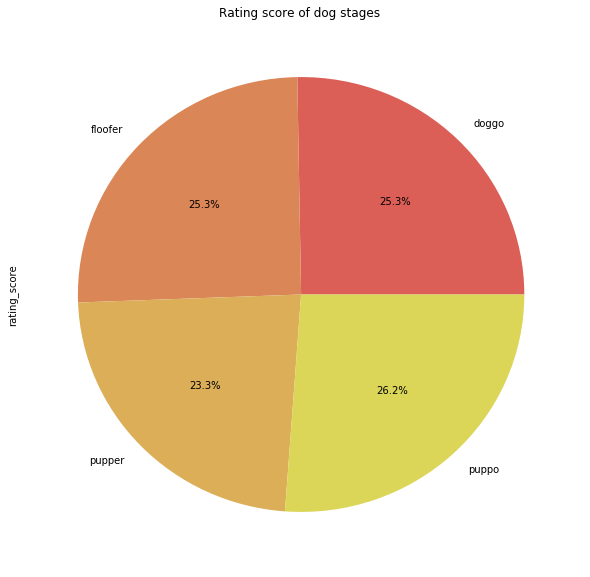

In [303]:
#ploting pie chart that represent rating score of dog stages
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colors = sns.color_palette('hls', 20)
main_archive_df.groupby('Dog_stages').rating_score.mean().plot(kind='pie',figsize = (10,10),colors=colors,legend=False, autopct='%1.1f%%')
plt.title("Rating score of dog stages ")

In [304]:
main_archive_df[main_archive_df.Dog_stages.notnull()]

,tweet_id,timestamp,source,tweet_content,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,jpg_url,...,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,rating_score,Dog_stages,p1,p2,p3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,0.029248,True,7711.0,32467.0,1.4,doggo,pembroke,cardigan,chihuahua
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaT,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,no name,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,True,0.004633,True,8538.0,38818.0,1.3,puppo,pembroke,cardigan,basenji
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaT,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,True,0.007958,True,2321.0,15359.0,1.3,puppo,golden retriever,labrador retriever,redbone
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaT,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,True,0.000076,True,3316.0,21524.0,1.2,pupper,french bulldog,chihuahua,boston bull
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaT,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,True,0.049148,True,3128.0,20771.0,1.2,doggo,german shepherd,malinois,norwegian elkhound
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaT,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,...,True,0.002140,True,3825.0,22986.0,1.3,floofer,chow,tibetan mastiff,newfoundland
49,882762694511734784,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaT,https://twitter.com/dog_rates/status/882762694...,12.0,10.0,Gus,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,...,True,0.015579,True,5134.0,28903.0,1.2,pupper,labrador retriever,chesapeake bay retriever,flat-coated retriever
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaT,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,no name,https://pbs.twimg.com/ext_tw_video_thumb/88153...,...,False,0.114854,False,16570.0,50199.0,1.4,pupper,samoyed,angora,persian cat
71,878776093423087618,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaT,https://twitter.com/dog_rates/status/878776093...,13.0,10.0,Snoopy,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,...,True,0.039725,True,4319.0,19763.0,1.3,puppo,italian greyhound,whippet,ibizan hound
82,876838120628539392,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaT,https://twitter.com/dog_rates/status/876838120...,12.0,10.0,Ginger,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,...,True,0.088935,True,3506.0,21125.0,1.2,pupper,bloodhound,redbone,tibetan mastiff


### Insight and Visualization#2: Most retweeted dog stage is doggo and the least retweeted dog stage is pupper while the most favorite stages is puppo and the least favorite dog stage is pupper. Therefore pupper is least retweeted and favorite dog stage amoung all stages of dog.

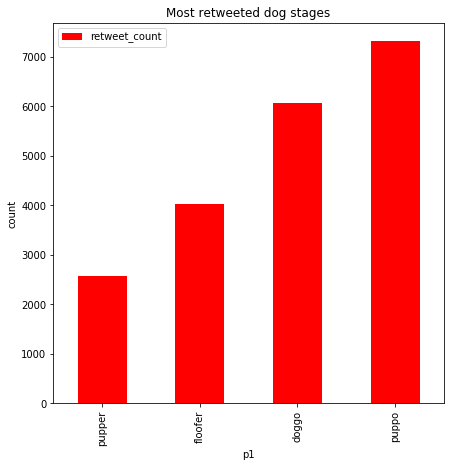

In [305]:
#plot of bar chart of dog stages based on retweet count
main_archive_df.groupby('Dog_stages').retweet_count.mean().sort_values().plot(kind='bar',figsize = (7,7), color='red')
plt.xlabel('p1')
plt.ylabel('count')
plt.title("Most retweeted dog stages")
plt.legend()

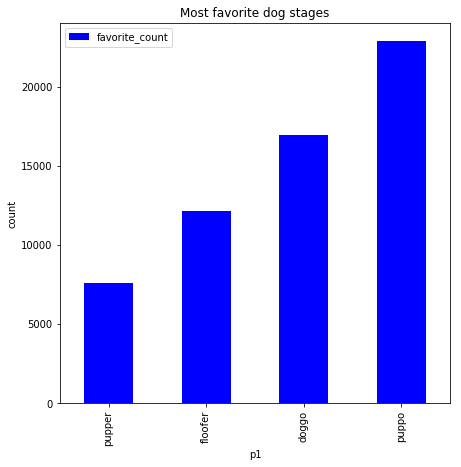

In [306]:
#plot of bar chart of dog stages based on favorite count 
main_archive_df.groupby('Dog_stages').favorite_count.mean().sort_values().plot(kind='bar',figsize = (7,7), color='blue')
plt.xlabel('p1')
plt.ylabel('count')
plt.title("Most favorite dog stages")
plt.legend()

### Insight and Visualization#3: Golden retriever is on the top of the prediction list of p1, casting more favorite and rating points in comparison to labrador retriever  while labrador retriever casted more retweet comparing to the golden retriver total number of retweets.

In [307]:
# Sort the DataFrame in descending order; will create a Series
s_temp = main_archive_df.p1.value_counts().sort_values(ascending=False)
# Count how many rows are not in the top ten
not_top_ten = len(s_temp) - 15
# Sum the values not in the top ten
not_top_ten_sum = s_temp.tail(not_top_ten).sum()
# Get the top ten values
s_top = s_temp.head(15)
# Append the sum of not-top-ten values to the Series
s_top[14] = not_top_ten_sum
df = pd.DataFrame(s_top)
df = df.reset_index(level=0)
df.rename(columns = {'index':'p1', 'p1':'counts'}, inplace = True)
df.p1=df.p1.replace("flat-coated retriever", "others", regex=True)

Text(0.5,1,'counts of p1 predictions of dog')

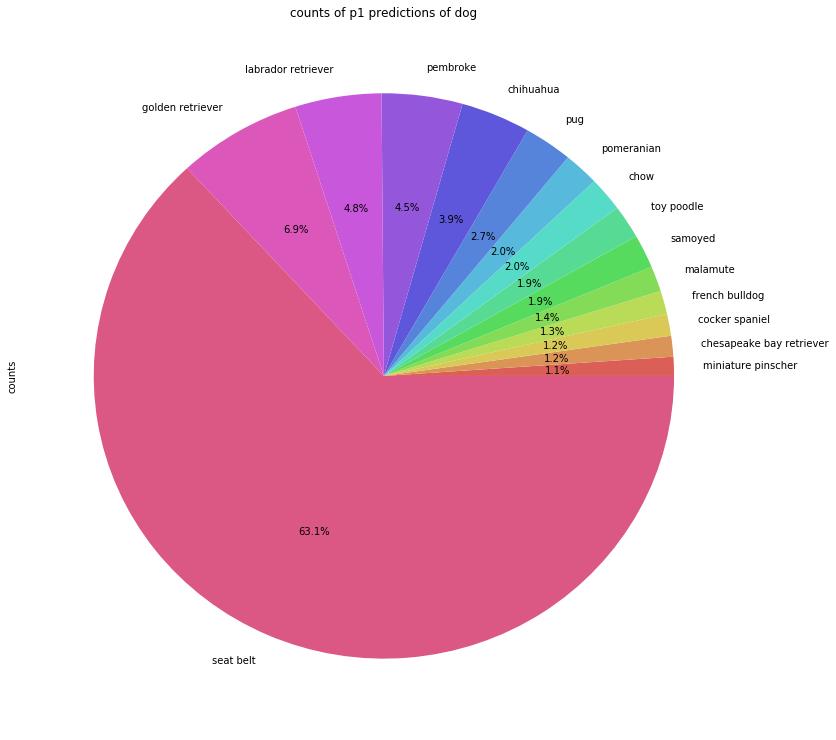

In [308]:
#pie chart plot of counts of p1 predictions of dog names
colors = sns.color_palette('hls', 15)
df.groupby('p1').counts.mean().sort_values().plot(kind='pie',figsize = (13,13),colors=colors,legend=False, autopct='%1.1f%%')
plt.title("counts of p1 predictions of dog")
#plt.legend()

In [309]:
main_archive_df.p1.value_counts()

golden retriever             134
labrador retriever            93
pembroke                      87
chihuahua                     75
pug                           52
chow                          38
pomeranian                    38
samoyed                       37
toy poodle                    37
malamute                      28
french bulldog                26
cocker spaniel                24
chesapeake bay retriever      23
miniature pinscher            21
seat belt                     20
siberian husky                20
german shepherd               20
staffordshire bullterrier     18
maltese dog                   18
teddy                         18
eskimo dog                    18
shetland sheepdog             18
rottweiler                    17
shih-tzu                      17
dalmatian                     17
beagle                        16
italian greyhound             16
kuvasz                        16
web site                      15
lakeland terrier              15
          

In [310]:
main_archive_df.query('p1=="golden retriever"').favorite_count.mean()

11366.664179104477

In [311]:
main_archive_df.query('p1=="golden retriever"').retweet_count.mean()

3262.0597014925374

In [312]:
main_archive_df.query('p1=="golden retriever"').rating_score.mean()

1.1584921328358209

In [313]:
main_archive_df.query('p1=="labrador retriever"').favorite_count.mean()

10478.569892473119

In [314]:
main_archive_df.query('p1=="labrador retriever"').retweet_count.mean()

3341.2903225806454

In [315]:
main_archive_df.query('p1=="labrador retriever"').rating_score.mean()

1.1186875892473116

Ref regarding visualization section https://stackoverflow.com/questions/29219055/plot-top-10-verse-all-other-values
